In [45]:
import pandas as pd
import numpy as np 

In [2]:
from keras.preprocessing import sequence
from keras.layers import Embedding, Dense, Flatten
from keras.models import Sequential


In [3]:
from sklearn import preprocessing


In [38]:
df_corpus = pd.read_csv('../output/word2vec_corpus.csv')
df_corpus.head(5)

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"['minuto', 'touro', 'ouro']",0.078066,-0.681861,-0.242816,-0.287935,-0.052421,0.331101,-0.139809,-0.379450,0.267952,...,-0.211810,0.132065,-0.106570,0.100519,0.056235,0.211425,0.015619,-0.055449,-0.076335,1
1,['sim'],0.219127,-0.408984,-0.176726,-0.270843,0.154609,0.169897,-0.016856,-0.248304,0.197370,...,-0.338304,0.263537,0.065959,0.021564,0.175807,0.181400,-0.136190,-0.056663,-0.056629,0
2,"['queria', 'saber', 'banking', 'própria']",0.139843,-0.536218,-0.217435,-0.219593,-0.017553,0.193954,-0.051410,-0.258538,0.166662,...,-0.251460,0.155440,-0.043917,0.123936,0.185161,0.097498,-0.046922,-0.040375,-0.083413,1
3,"['palmas', 'palmas', 'palmas', 'palmas']",0.146434,-0.234622,-0.173836,-0.255587,0.160331,0.161181,-0.023813,-0.191149,0.076497,...,-0.356565,0.168509,0.098124,0.088115,0.154685,0.217300,-0.187343,-0.033554,-0.157490,1
4,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",0.151519,-0.500928,-0.217571,-0.271197,-0.014306,0.233144,-0.057781,-0.306150,0.215858,...,-0.231650,0.143755,-0.044758,0.106567,0.123410,0.163982,-0.049926,-0.079451,-0.083599,1


In [21]:
df_cbow = pd.read_csv('../output/word2vec_cbow.csv')
df_cbow.tail(5)

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
5662,"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,...,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159,-1
5663,"['tá', 'diminuído', 'limite', 'do', 'cartão', ...",0.167840,-0.116767,0.164306,-0.076104,0.005502,0.163799,-0.007834,-0.001640,0.070826,...,-0.000848,-0.052661,0.149399,0.086086,0.036590,0.057364,-0.037924,0.033811,0.165939,-1
5664,"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,...,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216,-1
5665,"['muito', 'grato', 'todo', 'esforço', 'você', ...",0.160386,-0.116060,0.159980,-0.082443,-0.007597,0.142808,0.007682,0.011144,0.038226,...,0.011884,-0.071462,0.121843,0.085297,-0.001010,0.092900,-0.027534,0.014417,0.155917,-1
5666,"['morning', 'call', 'não', 'mais', 'aparecendo...",0.156320,-0.132666,0.195870,-0.072017,0.011870,0.183802,-0.006948,-0.003709,0.039860,...,-0.007778,-0.050418,0.134998,0.082059,0.006806,0.077923,-0.015977,0.027076,0.135846,-1


### Aplicando o pré processamento do texto

In [16]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [39]:
# Substituindo os nomes na variavel alvo
df_corpus = df_corpus.replace({0: "neutro", 1: "positivo", -1:"negativo"})

In [40]:
df_corpus

,Frase,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
0,"['minuto', 'touro', 'ouro']",0.078066,-0.681861,-0.242816,-0.287935,-0.052421,0.331101,-0.139809,-0.379450,0.267952,...,-0.211810,0.132065,-0.106570,0.100519,0.056235,0.211425,0.015619,-0.055449,-0.076335,positivo
1,['sim'],0.219127,-0.408984,-0.176726,-0.270843,0.154609,0.169897,-0.016856,-0.248304,0.197370,...,-0.338304,0.263537,0.065959,0.021564,0.175807,0.181400,-0.136190,-0.056663,-0.056629,neutro
2,"['queria', 'saber', 'banking', 'própria']",0.139843,-0.536218,-0.217435,-0.219593,-0.017553,0.193954,-0.051410,-0.258538,0.166662,...,-0.251460,0.155440,-0.043917,0.123936,0.185161,0.097498,-0.046922,-0.040375,-0.083413,positivo
3,"['palmas', 'palmas', 'palmas', 'palmas']",0.146434,-0.234622,-0.173836,-0.255587,0.160331,0.161181,-0.023813,-0.191149,0.076497,...,-0.356565,0.168509,0.098124,0.088115,0.154685,0.217300,-0.187343,-0.033554,-0.157490,positivo
4,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",0.151519,-0.500928,-0.217571,-0.271197,-0.014306,0.233144,-0.057781,-0.306150,0.215858,...,-0.231650,0.143755,-0.044758,0.106567,0.123410,0.163982,-0.049926,-0.079451,-0.083599,positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,"['excelente', 'explicação']",0.233356,-0.433924,-0.272217,-0.314453,-0.036260,0.256107,-0.033117,-0.292216,0.242472,...,-0.156774,0.208884,-0.075381,0.039420,0.062635,0.112375,-0.058631,-0.109948,-0.073896,negativo
5663,"['porque', 'brg', 'tá', 'diminuído', 'limite',...",0.156947,-0.584779,-0.194561,-0.271622,-0.046859,0.263095,-0.090514,-0.318417,0.241259,...,-0.234681,0.149967,-0.067125,0.093000,0.116992,0.154841,-0.043088,-0.060749,-0.081761,negativo
5664,"['atendam', 'telefone', 'amor', 'deus']",0.145733,-0.585372,-0.215295,-0.317303,-0.041272,0.284987,-0.116252,-0.368979,0.256614,...,-0.231181,0.162746,-0.076660,0.088449,0.105912,0.181612,-0.021021,-0.070964,-0.086959,negativo
5665,"['grato', 'todo', 'esforço', 'rendeu', 'invest...",0.170928,-0.599077,-0.227178,-0.292141,-0.052094,0.276457,-0.083850,-0.347391,0.266818,...,-0.218465,0.155783,-0.084950,0.086562,0.100502,0.169236,-0.014393,-0.080405,-0.071225,negativo


In [41]:
input_var = df_corpus['Frase']

In [42]:
output_var = df_corpus['sentimento']
output_var

0       positivo
1         neutro
2       positivo
3       positivo
4       positivo
          ...   
5662    negativo
5663    negativo
5664    negativo
5665    negativo
5666    negativo
Name: sentimento, Length: 5667, dtype: object

In [43]:
max_words = 8000

# Tokenizando o corpus
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(input_var)

x = tokenizer.texts_to_sequences(input_var)
x = pad_sequences(x, maxlen = 300)


In [48]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(output_var)

y = np.array(label_tokenizer.texts_to_sequences(output_var))


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [53]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 128, input_length = 300))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [54]:
history = model_lstm.fit(
    x_train,
    y_train,
    validation_data=(x_test,y_test) , 
    epochs = 10,
    batch_size = 512
)


Epoch 1/10
9/9 [==============================] - 128s 15s/step - loss: 1.4184 - accuracy: 0.4487 - val_loss: 1.0971 - val_accuracy: 0.4462
Epoch 2/10
9/9 [==============================] - 197s 23s/step - loss: 1.0979 - accuracy: 0.4218 - val_loss: 1.0561 - val_accuracy: 0.4462
Epoch 3/10
9/9 [==============================] - 260s 29s/step - loss: 1.0437 - accuracy: 0.4719 - val_loss: 0.9988 - val_accuracy: 0.5009
Epoch 4/10
9/9 [==============================] - 202s 22s/step - loss: 0.9788 - accuracy: 0.5319 - val_loss: 0.9355 - val_accuracy: 0.5265
Epoch 5/10
9/9 [==============================] - 329s 38s/step - loss: 0.9011 - accuracy: 0.5764 - val_loss: 0.8662 - val_accuracy: 0.5635
Epoch 6/10
9/9 [==============================] - 377s 41s/step - loss: 0.7839 - accuracy: 0.6724 - val_loss: 0.7979 - val_accuracy: 0.6693
Epoch 7/10
9/9 [==============================] - 371s 41s/step - loss: 0.6669 - accuracy: 0.7406 - val_loss: 0.8023 - val_accuracy: 0.6552
Epoch 8/10
9/9 [====

In [55]:
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                      

In [56]:
model_lstm.evaluate(x_test, y_test)


36/36 [==============================] - 2s 42ms/step - loss: 0.8743 - accuracy: 0.6631


[0.874265730381012, 0.6631393432617188]

In [66]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [59]:
# Criando as predições para testar a matriz 
y_pred = np.argmax(model_lstm.predict(x_test), axis=1)

36/36 [==============================] - 2s 47ms/step


In [72]:
import sklearn.metrics

acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print("Acurácia do modelo ", acc)

Acurácia do modelo  0.6631393298059964


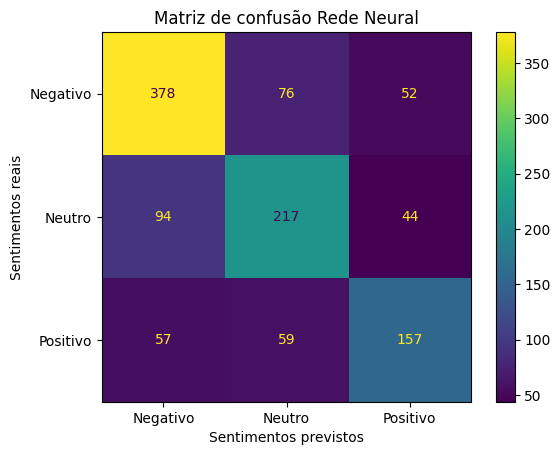

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix_corpus = metrics.confusion_matrix(y_test, y_pred)
cm_corpus = ConfusionMatrixDisplay(confusion_matrix_corpus, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_corpus.plot()
cm_corpus.ax_.set(
                title='Matriz de confusão Rede Neural', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()

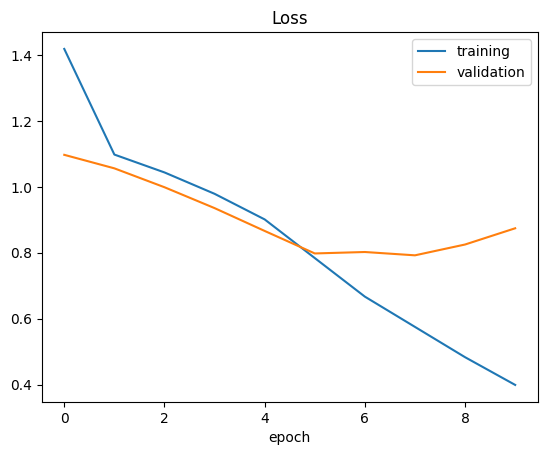

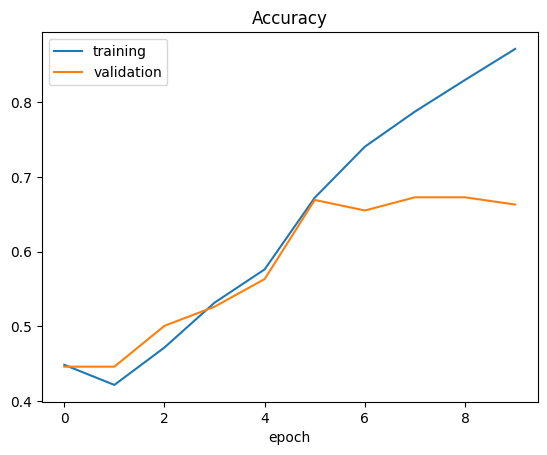

In [57]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [58]:
# Checar o recall 

In [ ]:
# Rodar regressão linear com o word2vec pra entender quais colunas são mais importantes
